### Step 1. Loading Dataset
Load the `Prima Indians Onset of Diabates` dataset. It is a standard machine learning dataset available for free download from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years. It is a binary classification problem (onset of diabetes as 1 or not as
0)


- NTP: Number of times pregnant.
- PGC: Plasma glucose concentration a 2 hours in an oral glucose tolerance test. 3. Diastolic blood pressure (mm Hg).
- TSFT: Triceps skin fold thickness (mm).
- 2hSI: 2-Hour serum insulin (mu U/ml).
- BMI: Body mass index.
- DPF: Diabetes pedigree function.
- Age: Age (years).
- OnDiab: Class, onset of diabetes within five years.


- Set the dataset columns names to `['NTP', 'PGC','DBP','TSFT','2hSI','BMI','DPF','Age','OnDiab']`.
- Print the size of the data set.
- Print the first 10 observations of your data set

In [2]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

print(df.head())

   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0


In [3]:
df.columns = ['NTP', 'PGC', 'DBP', 'TSFT', '2hSI', 'BMI', 'DPF', 'Age', 'OnDiab']
print(df.head())

   NTP  PGC  DBP  TSFT  2hSI   BMI    DPF  Age  OnDiab
0    1   85   66    29     0  26.6  0.351   31       0
1    8  183   64     0     0  23.3  0.672   32       1
2    1   89   66    23    94  28.1  0.167   21       0
3    0  137   40    35   168  43.1  2.288   33       1
4    5  116   74     0     0  25.6  0.201   30       0


In [4]:
print("The size of the dataset is:", df.shape)

The size of the dataset is: (767, 9)


In [7]:
print("The first 10 observations of the data set:")
print()
print(df.head(10))

The first 10 observations of the data set:

   NTP  PGC  DBP  TSFT  2hSI   BMI    DPF  Age  OnDiab
0    1   85   66    29     0  26.6  0.351   31       0
1    8  183   64     0     0  23.3  0.672   32       1
2    1   89   66    23    94  28.1  0.167   21       0
3    0  137   40    35   168  43.1  2.288   33       1
4    5  116   74     0     0  25.6  0.201   30       0
5    3   78   50    32    88  31.0  0.248   26       1
6   10  115    0     0     0  35.3  0.134   29       0
7    2  197   70    45   543  30.5  0.158   53       1
8    8  125   96     0     0   0.0  0.232   54       1
9    4  110   92     0     0  37.6  0.191   30       0


### Step 2: Data type and description for each attribute
- Print the data type for each attribute using `dtypes` method of a pandas data frame
- Descriptive statistics can give you great insight into the properties of each attribute. Often you can create more summaries than you have time to review. The `describe()` function on the Pandas DataFrame lists 8 statistical properties of each attribute. They are: Count, Mean, Standard Deviation, Minimum Value, 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value.
- On classication problems you need to know how balanced the class values are. Highly imbalanced problems (a lot more observations for one class than another) are common and may need special handling in the data preparation stage of your project. You can quickly get an idea of the distribution of the `OnDiab` attribute in Pandas. Grup your data by `OnDiab` attribute and use the `size` method to count the number of different values of `class` attribute.

In [8]:
print(df.dtypes)

NTP         int64
PGC         int64
DBP         int64
TSFT        int64
2hSI        int64
BMI       float64
DPF       float64
Age         int64
OnDiab      int64
dtype: object


In [9]:
print(df.describe())

              NTP         PGC         DBP        TSFT        2hSI         BMI  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean     3.842243  120.859192   69.101695   20.517601   79.903520   31.990482   
std      3.370877   31.978468   19.368155   15.954059  115.283105    7.889091   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   32.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  127.500000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              DPF         Age      OnDiab  
count  767.000000  767.000000  767.000000  
mean     0.471674   33.219035    0.348110  
std      0.331497   11.752296    0.476682  
min      0.078000   21.000000    0.000000  
25%      0.243500   24.000000    0.000000  
50%   

In [13]:
# Group the data by the 'OnDiab' attribute and count the occurrences
class_distribution = df.groupby('OnDiab').size()
print(class_distribution)

OnDiab
0    500
1    267
dtype: int64


### Step 3: Draw the histogram of your data attributes.
A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms
group data into bins and provide you a count of the number of observations in each bin. From
the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed
or even has an exponential distribution. It can also help you see possible outliers.

- Use `hist()` method of pandas data frame to plot the histograms.

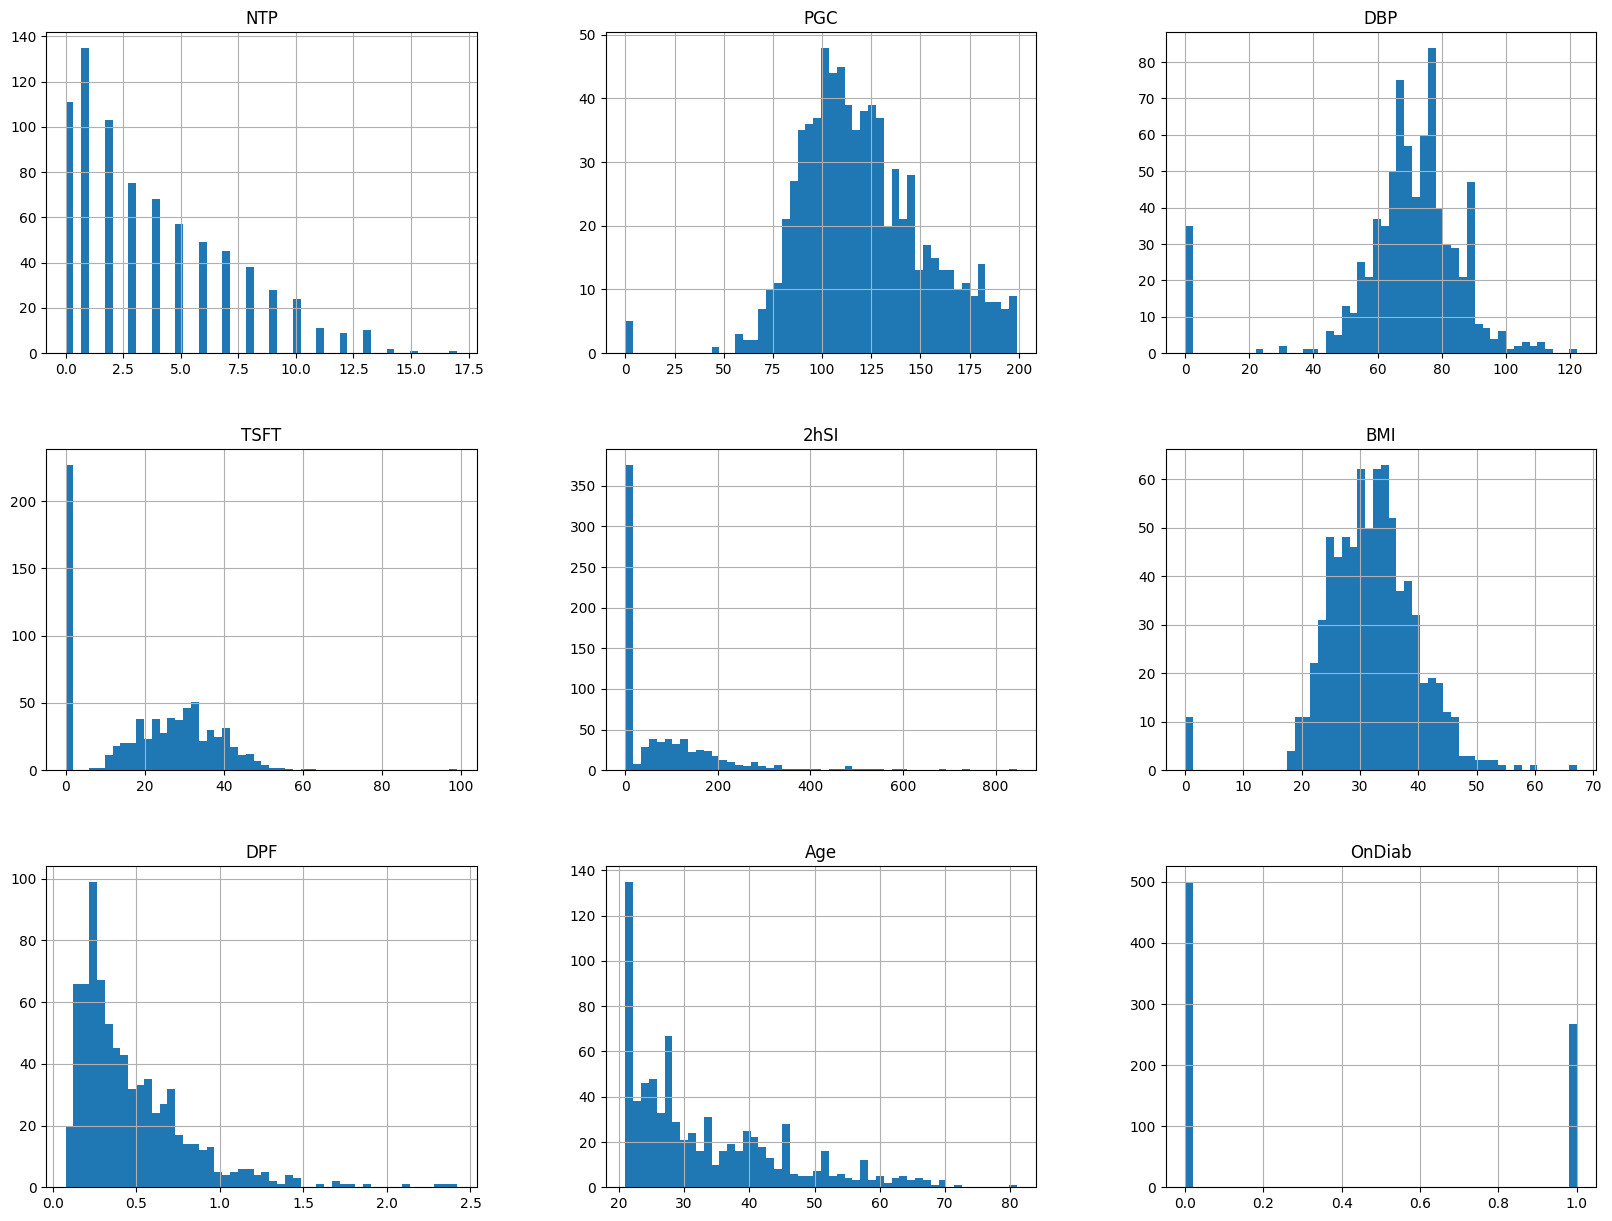

In [18]:
import matplotlib.pyplot as plt

# Plot histograms(直方图) for each attribute in the DataFrame
df.hist(bins=50, figsize=(20, 15))

plt.show()

### Step 4: Running a Classifier
- Separate your dataset into feature set `X` and target variable `y`. Your target variable is `OnDiab`.
- Split your dataset into train and test datasets, keep the test dataset size as 0.25 using `test_size` parameter of `train_test_split`. Set the random seed top 7 using `random_state` parameter of `train_test_split`. Make a stratified split.
- Train `KNearestNeighbor` classifer on your train dataset and print the score on the the test dataset. Set number of neighbors to 5.

In [14]:
# Set X to all columns except 'OnDiab'
X = df.drop('OnDiab', axis=1)

# Set y to only the 'OnDiab' column
y = df['OnDiab']

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   NTP  PGC  DBP  TSFT  2hSI   BMI    DPF  Age
0    1   85   66    29     0  26.6  0.351   31
1    8  183   64     0     0  23.3  0.672   32
2    1   89   66    23    94  28.1  0.167   21
3    0  137   40    35   168  43.1  2.288   33
4    5  116   74     0     0  25.6  0.201   30

Target (y):
0    0
1    1
2    0
3    1
4    0
Name: OnDiab, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, stratify=y)

# Print the sizes of the train and test sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (575, 8) (575,)
Testing set shape: (192, 8) (192,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Use the trained classifier to predict the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier on the test data
accuracy = knn.score(X_test, y_test)

# Print the accuracy
print("Accuracy of K-Nearest Neighbors classifier on test data:", accuracy)

Accuracy of K-Nearest Neighbors classifier on test data: 0.7135416666666666


### Step 5 : Grid Search
- Import `GridSearchCV` from `sklearn.model_selection`
- Split your data into train and test datasets
- For `neighbors=1 to 30`, compute `GridSearchCV` for train dataset with kfold=10.
- Print the best cross validation score
- Print the best parameter
- Print the test score

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier()

In [22]:
param_grid = {'n_neighbors': range(1, 31)}

In [23]:
knn_gscv = GridSearchCV(knn, param_grid, cv=10)

In [24]:
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)})

In [25]:
best_neighbors = knn_gscv.best_params_['n_neighbors']
best_score = knn_gscv.best_score_
test_score = knn_gscv.best_estimator_.score(X_test, y_test)

In [26]:
print("Best parameter (n_neighbors):", best_neighbors)
print("Best cross validation score:", best_score)
print("Test score:", test_score)

Best parameter (n_neighbors): 8
Best cross validation score: 0.7319116757410769
Test score: 0.734375
